In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
data = open('three_kind_andMark/G_in/first_chan.csv', encoding = 'utf-8')
df = pd.read_csv(data, skiprows = 0)
print('data size:', df.shape)
df.head()

data size: (1314, 6)


,ID,X,T-01,T-04,T-05,T-06
0,15-10001,0,1.2,36.0,0.0,1.0
1,15-10002,0,19.1,79.0,32.9,2.0
2,15-10003,1,21.8,106.0,9.7,1.0
3,15-10004,0,177.7,699.0,7.1,1.0
4,15-10005,1,138.2,41437.0,8.5,1.0


In [14]:
#挑选出 T-06 = 1  X = 1
li = df[df['T-06'] == 1]
li = li[li['X'] == 1]
print(li.shape[0])
#sum = 0
#for i in li:
#    if i == 1:
#        sum += 1
#print(sum)
#print(len(li))

292


In [15]:
#挑选出 T-06 = 2  X = 0

li1 = df[df['T-06'] == 2]
li1 = li1[li1['X'] == 0]
print(li1.shape[0])

#sum1 = 0
#for i in li1:
#    if i == 0:
#        sum1 += 1
#print(sum1)
#print(len(li1))

217


In [17]:
# 将 li 和 li1合并为新的df
df = pd.concat([li, li1], axis = 0)
df.shape

#保存数据df
df.to_csv('first_chan_T06_Cleaned.csv', index = False, header = True, encoding = 'utf-8')

ID：病例编号
X：分类目标
其余特征表示一线标志物

# 数据的直观分布

## 数据构成比例

### 时间与患病数

In [6]:
df['Year'] = df['ID']. apply(lambda row : row.split('-')[0] )
a = df[['Year', 'X', 'ID']].groupby(['Year', 'X']).count()
a

ID
Year X      
2015 0   965
     1  1050
2016 0  1441
     1  1206
2017 0  1441
     1  1109

In [4]:
plt.style.use('seaborn')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024B47B76898>,
      dtype=object)

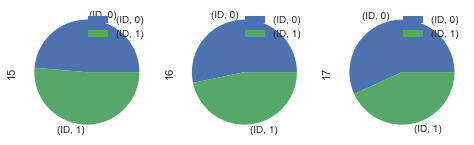

In [5]:
b = a.unstack()
b
(b.T).plot(kind = 'pie', subplots = True)

## 特征的分布规律

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111193518>,
      dtype=object)

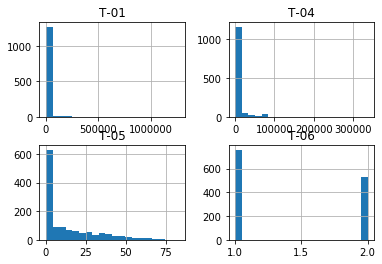

In [4]:
#复制除编号以及病状的所有特征
features = [x for x in df.columns if x not in['ID', 'X'] ]
plt.figure()
ax = plt.subplot(111)
df.hist(column = features, bins = 20, ax = ax)

正相关的特征分布

In [ ]:
df.hist(column = ['','',''], bins = 20)

负相关的特征分布

In [ ]:
df.hist(column = ['','',''], bins = 20)

## 数据的正态化变换



T-01和T-04两个特征的分布图不符合正态性

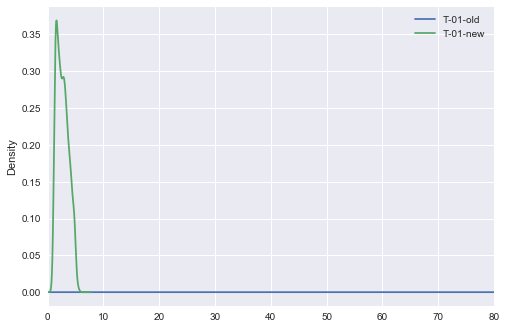

In [38]:
df['T-04'].plot(kind = 'kde', xlim = [0,80], label = 'T-04-old')

np.log10(df['T-04']).plot(kind = 'kde', xlim = [0,80], label = 'T-04-new')
plt.legend()

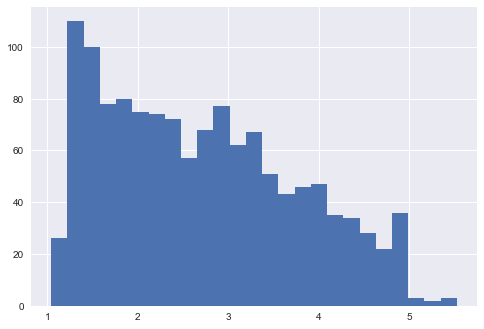

In [44]:
np.log10(df['T-04']).hist(bins = 25)

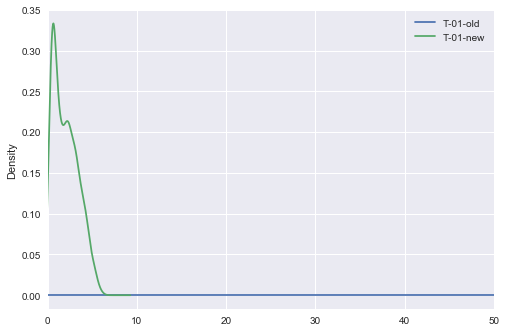

In [46]:
df['T-01'].plot(kind = 'kde', xlim = [0,50], label = 'T-01-old')

np.log10(df['T-01']).plot(kind = 'kde', xlim = [0,50], label = 'T-01-new')
plt.legend()

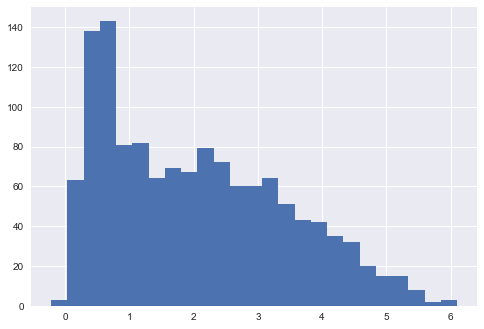

In [47]:
np.log10(df['T-01']).hist(bins = 25)

# 数据的浓缩

五数概括法：  
最小值、最大值、中位数、上四分位数、下四分位数

In [5]:
print('数据的概况总览')
df.describe()

数据的概况总览


,X,T-01,T-04,T-05,T-06
count,1314.000000,1.311000e+03,1296.000000,1289.000000,1289.000000
mean,0.468798,1.011573e+04,7102.325617,13.467029,1.411947
std,0.499215,5.796223e+04,21964.142833,17.657283,0.492377
min,0.000000,6.050000e-01,11.000000,0.000000,1.000000
25%,0.000000,5.800000e+00,61.000000,0.000000,1.000000
50%,0.000000,7.080000e+01,397.500000,4.800000,1.000000
75%,1.000000,1.193500e+03,2865.000000,22.400000,2.000000
max,1.000000,1.261300e+06,336821.000000,82.700000,2.000000


In [12]:
df['T-05'].describe()

count    1289.000000
mean       13.467029
std        17.657283
min         0.000000
25%         0.000000
50%         4.800000
75%        22.400000
max        82.700000
Name: T-05, dtype: float64

In [13]:
print('以特征T-05为例：')
print('均值 = ', df['T-05'].mean())
print('方差 = ', df['T-05'].var())
print('偏度 = ', df['T-05'].skew())
print('峰度 = ', df['T-05'].kurt())

以特征T-05为例：
均值 =  13.467028704422036
方差 =  311.7796496272793
偏度 =  1.3496123027782139
峰度 =  0.9786418187416666


## 箱型图和异常值

In [14]:
import seaborn as sns

使用seaborn的箱线图展示

同样以T-05为例，看各分类的箱型图：


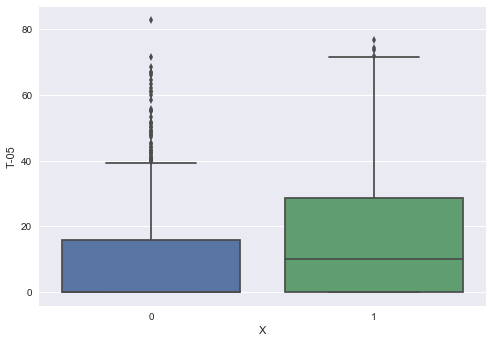

In [15]:
sns.boxplot(x = 'X', y = 'T-05', data = df)
print('同样以T-05为例，看各分类的箱型图：')

异常值分析：  
1) 大于Q3+1.5*IQR或小于Q1-1.5IQR的值，其中IQR为四分位距  
2) 3西格玛原则，数值分布在（μ—3σ,μ+3σ)中的概率为0.9974 

## 数据相关性

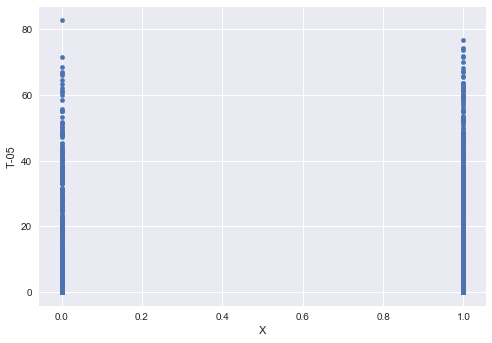

In [16]:
df[['X', 'T-05']].plot(x = 'X', y = 'T-05', kind = 'scatter')

患病和特征T-05不具有相关性

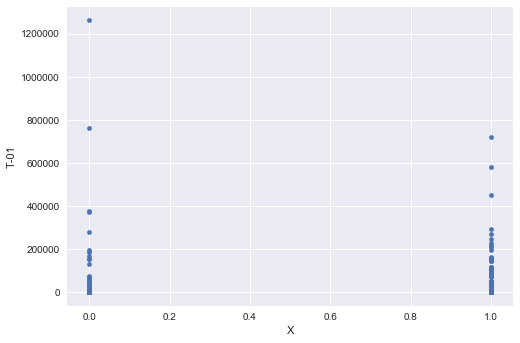

In [17]:
df[['X','T-01']].plot(x = 'X', y = 'T-01', kind = 'scatter')

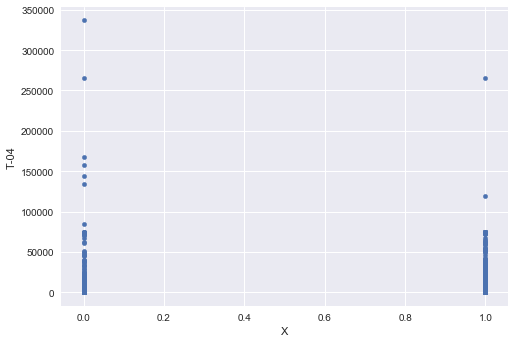

In [18]:
df[['X','T-04']].plot(x = 'X', y = 'T-04', kind = 'scatter')

T-01和T-05线性无关


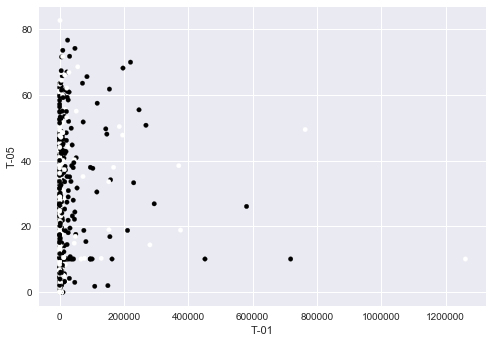

In [19]:
df[['T-01', 'T-05']].plot(x='T-01', y='T-05', c=df['X'], kind='scatter')
print('T-01和T-05线性无关')

T-01、T-04、T-05、T-06两两之间线性无关

## 相关系数矩阵

In [75]:
#def process(x):
#    if 0<= x <= 30:
#        return 0
#    elif 30< x < 60:
#        return 1
#    else:
#        return 2
#df['T-05-new'] = df['T-05'].apply(lambda x : process(x))
#df['T-05-new']

皮尔逊相关系数：
    值域为[-1,1], 1表示完全正相关， -1表示完全负相关，0表示无关， 绝对值越大表明相关性越强

In [6]:
df.corr(method = 'spearman')

,X,T-01,T-04,T-05,T-06
X,1.000000,0.270143,0.240965,0.242085,0.203255
T-01,0.270143,1.000000,0.327054,0.755613,0.604424
T-04,0.240965,0.327054,1.000000,0.236672,0.218590
T-05,0.242085,0.755613,0.236672,1.000000,0.882295
T-06,0.203255,0.604424,0.218590,0.882295,1.000000


In [7]:
corr_mat = df.corr(method = 'pearson')
corr_mat['X'].abs().sort_values(
    ascending = False) #得到性别与其他特征的相关系数  倒序

X       1.000000
T-06    0.203255
T-05    0.200476
T-04    0.074018
T-01    0.047584
Name: X, dtype: float64

# 预处理和降维

## 异常值的处理

### 缺失值处理

In [6]:
print("观察缺失值的比例，以决定采用填补还是丢弃")
df.isnull().describe()

观察缺失值的比例，以决定采用填补还是丢弃


,ID,X,T-01,T-04,T-05,T-06
count,1314,1314,1314,1314,1314,1314
unique,1,1,2,2,2,2
top,False,False,False,False,False,False
freq,1314,1314,1311,1296,1289,1289


这里直接删除包含缺失的样本  
实际应用中可能需要适合的fill none算法  

In [3]:
df.dropna(inplace = True) #数据清洗
print('剩余样本：', df.shape)

剩余样本： (1280, 6)


## 离群点处理

这里直接用3西格玛原则删除了异常的年龄  
实际应用中需要适合的outlier detect算法

3西格玛原则：|采样点与均值的差| > 3倍标准差 --》 则剔除
变形为：
     Xi< X - 3σ or  Xi > X + 3σ

In [4]:
cols = df.columns


for i in range(2,df.shape[1]-1):
    up_bound = df[cols[i]].mean() + 3*df[cols[i]].std()
    low_bound = df[cols[i]].mean() - 3*df[cols[i]].std()
    df = df[(df[cols[i]]<=up_bound) & (df[cols[i]]>=low_bound)]
    print("处理特征%s, 剩余样本：%d" % (cols[i],df.shape[0]))



处理特征T-01, 剩余样本：1264
处理特征T-04, 剩余样本：1231
处理特征T-05, 剩余样本：1218


## 数据降维

### 主成分分析

#### to maximize Var(c1X1 + c2X2 + c3X3 + ...) 其中 c1^2 + c2^2 +....+ cp^2 = 1

PCA算法流程：  
1) 0均值化：将X的每一维数据分别减去其平均值，即 X=X-Mean（X）  
2) 协方差矩阵：协方差矩阵C可以描述m维属性之间的相关关系，即 C=(X'X)/m  
3) 数据降维：协方差矩阵C是m*m阶，选取的特征向量矩阵P是m*k阶。通过 Y=XP 即得到投影后的k维样本。

In [8]:
from sklearn.decomposition import PCA
# 直接调包实现了，手写也不复杂
features = [i for i in df.columns if i not in ['ID', 'X', 'Year']]  #feature中去除了 'ID', 'X', 'Year'
X, y = df[features], df['X']
#PCA算法所要保留下来的主成分个数
pca = PCA(n_components=4)
pca.fit(X)
print('降维后 各主成分的方差值') 
print(pca.explained_variance_ratio_)
print('返回各主成分的方差百分比(贡献率)')
print(pca.explained_variance_)

ModuleNotFoundError: No module named 'sklearn'

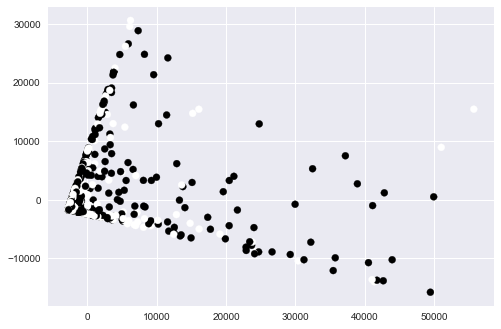

In [50]:
# n_component PCA算法中要保留的成分个数
pca = PCA(n_components=2)
#训练模型  用数据X来训练
pca.fit(X)
#返回降维后的数据
X_new = pca.transform(X)
#画出散点图
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, marker='o')  # y = 0 /1 /2
plt.show()

# 参数检测和方差分析

In [51]:
from scipy.stats.mstats import kruskalwallis
import scipy.stats as stats
import numpy as np
import scipy as sp

#啥叫显著性差异
# p>0.05 表示差异不显著
# 0.01 < p < 0.05 表示差异性显著
# p< 0.01 表示差异性极显著

#三组非正太分布数据检验
def Kruskawallis_test(list1, list2, list3):
    # Perform the Kruskal-Wallis test,返回True表示有显著差异，返回False表示无显著差异
    print("Use kruskawallis test:")
     
    h, p = kruskalwallis(list1, list2, list3)
    print("H value:",h)
    print("p value:",p)
      
    # Print the results
    if p<0.05:
        print('There is a significant difference.')
        return True
    else:
        print('No significant difference.')
        return False

#两组非正态分布数据检验   有关于统计学的知识
def Mannwhitneyu(group1, group2):   
    #以下处理sp版本问题 
    if np.int(sp.__version__.split('.')[1]) > 16:
        u, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
    else:
        u, p_value = stats.mannwhitneyu(group1, group2, use_continuity=True)
        p_value *= 2    # because the default was a one-sided p-value
    print(("Mann-Whitney test", p_value))
    if p_value<0.05:
        print("there is significant difference")
    else:
        print("there is no significant difference")

## 单因素方差分析

In [52]:
#检验T-06和患病是否有关
list_1 = df[df['T-06'] == 1]['X'].tolist()
list_2 = df[df['T-06'] == 2]['X'].tolist()

#独立T检验
print(stats.ttest_ind(list_1, list_2))

#Mannwhitneyu 检验
print(Mannwhitneyu(list_1, list_2))


Ttest_indResult(statistic=-6.8452522153543045, pvalue=1.2444486210770087e-11)
('Mann-Whitney test', 1.9250260318708418e-11)
there is significant difference
None


结果说明，T-06和患病与否有显著性相关

## 多因素方差分析

连续型的属性，需要采样后进行多因子的方差分析  
例如T-05，可以分成多段bins与其他因素结合 

In [53]:
def process(x):
    if 0<= x <=30:
        return 0
    elif 30< x< 60:
        return 1
    else:
        return 2

df['T-05-new'] = df['T-05'].apply(lambda x : process(x))
df['T-05-new'].head()

0    0
1    1
2    0
3    0
5    1
Name: T-05-new, dtype: int64

In [54]:
list_T05_0 = df[df['T-05-new']==0]['X'].tolist()
list_T05_1 = df[df['T-05-new']==1]['X'].tolist()
list_T05_2 = df[df['T-05-new']==2]['X'].tolist()
list_group = [list_T05_0, list_T05_1, list_T05_2]

#Kruskawallis_test  三组非正太分布数据检验
Kruskawallis_test(list_T05_0, list_T05_1, list_T05_2)

Use kruskawallis test:
H value: 14.75142613506185
p value: 0.0006262799592855557
There is a significant difference.


True

结果说明，T-05和患病与否具有显著相关

# 完整的处理流程

## 数据分析

## 数据清洗

### 删除缺失> 15%的列

In [5]:
isnull_df = df.isnull().describe()
isnull_df

,ID,X,T-01,T-04,T-05,T-06
count,1218,1218,1218,1218,1218,1218
unique,1,1,1,1,1,1
top,False,False,False,False,False,False
freq,1218,1218,1218,1218,1218,1218


In [6]:
isnull_df.loc[:, isnull_df.loc['freq'] < isnull_df.loc['count']*0.85]

""
count
unique
top
freq


In [27]:
#删除缺失值比例大于0.85的列
#df.drop(columns = [ ''] ,inplace = True)
#df.head()

### 删除相关性<0.01的列

In [7]:
corr_mat = df.corr(method = 'pearson')
corr_mat['X'].abs().sort_values(ascending = False)

X       1.000000
T-06    0.206570
T-05    0.202943
T-04    0.125348
T-01    0.118387
Name: X, dtype: float64

In [8]:
corr = corr_mat['X'].abs()
print(corr[corr < 0.01].index)

Index([], dtype='object')


In [9]:
df.drop(columns = [] , inplace = True)
df.head()

,ID,X,T-01,T-04,T-05,T-06
0,15-10001,0,1.2,36.0,0.0,1.0
1,15-10002,0,19.1,79.0,32.9,2.0
2,15-10003,1,21.8,106.0,9.7,1.0
3,15-10004,0,177.7,699.0,7.1,1.0
4,15-10005,1,138.2,41437.0,8.5,1.0


## 数据预处理

### 删除6sigma离群点

In [10]:
print('原始样本', df.shape)
des_df = df.describe()
des_df

原始样本 (1218, 6)


,X,T-01,T-04,T-05,T-06
count,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000
mean,0.463875,4967.970369,4191.701970,12.404187,1.392447
std,0.498898,19341.103813,10352.921945,16.380925,0.488496
min,0.000000,0.605000,11.000000,0.000000,1.000000
25%,0.000000,5.500000,56.250000,0.000000,1.000000
50%,0.000000,57.400000,342.000000,4.000000,1.000000
75%,1.000000,859.100000,2317.250000,20.875000,2.000000
max,1.000000,185478.000000,70450.000000,64.500000,2.000000


离群点大于Q3+1.5*IQR或小于Q1-1.5IQR的值，其中IQR为四分位距 箱线图中上限和下限

In [11]:
des_df.loc['25%', 'T-05']

0.0

In [12]:


#得到目前为止 经过清洗后的数据的特征名 除 ‘ID’ 'X':病情
features = [x for x in df.columns if x not in['ID', 'X']] 
#提取出除X外 与x相关系数大于0.1的索引
importances = [x for x in corr[corr>0.1].index.tolist() if x != 'X']
for x in features:
#     upper_bound = des_df.loc['75%', x] + 1.5*(des_df.loc['75%', x]-des_df.loc['25%', x])
#     lower_bound = des_df.loc['25%', x] - 1.5*(des_df.loc['75%', x]-des_df.loc['25%', x])
    upper_bound = des_df.loc['mean', x] + 6*des_df.loc['std', x]
    lower_bound = des_df.loc['mean', x] - 6*des_df.loc['std', x]
    if x in importances:
        df = df[(df[x]<=upper_bound) & (df[x]>=lower_bound)]
    else:
        df.loc[df[x]>upper_bound, x] = upper_bound
        df.loc[df[x]<lower_bound, x] = lower_bound
print("剩余样本：", df.shape)

剩余样本： (1202, 6)


In [13]:
df.isnull().describe()

,ID,X,T-01,T-04,T-05,T-06
count,1202,1202,1202,1202,1202,1202
unique,1,1,1,1,1,1
top,False,False,False,False,False,False
freq,1202,1202,1202,1202,1202,1202


### 分段mean 补全缺失值

In [13]:
df[['X', 'ID']].groupby('X').count()

,ID
X,
0,698
1,616


In [14]:
# 分段 按x=0， 1， 2不同情况 把每列进行均值填充
print(df['X'].unique().tolist())
for x in df['X'].unique().tolist():
    #复制所有df['X'] = 当前遍历值 的行
    tmp = df[df['X']==x].copy(deep=False)
   #tmp.fillna(tmp.mean(axis=0, skipna=True), inplace=True)
    #print(tmp.mean())
    #以'X' 为分组， NAN均以每列的平均值填充 
    df.loc[df['X']==x] = df[df['X']==x].fillna(tmp.mean()) 
df.isnull().describe()

[0, 1]


,ID,X,T-01,T-04,T-05,T-06
count,1314,1314,1314,1314,1314,1314
unique,1,1,1,1,1,1
top,False,False,False,False,False,False
freq,1314,1314,1314,1314,1314,1314


### 数据标准化

In [14]:
features = [x for x in df.columns if x not in['ID', 'X']] 
for x in features:
    delta = 0.000001
    df[x] = (df[x] - df[x].mean()) / (df[x].std() + delta)
df.describe()

,X,T-01,T-04,T-05,T-06
count,1202.000000,1.202000e+03,1.202000e+03,1.202000e+03,1.202000e+03
mean,0.463394,8.867006e-18,-1.477834e-18,1.123154e-16,-1.832515e-16
std,0.498866,1.000000e+00,1.000000e+00,9.999999e-01,9.999979e-01
min,0.000000,-2.831801e-01,-4.081940e-01,-7.516557e-01,-7.939828e-01
25%,0.000000,-2.827803e-01,-4.035165e-01,-7.516557e-01,-7.939828e-01
50%,0.000000,-2.788680e-01,-3.763236e-01,-5.234954e-01,-7.939828e-01
75%,1.000000,-2.196718e-01,-1.762746e-01,5.078508e-01,1.258420e+00
max,1.000000,9.260690e+00,6.467257e+00,3.225733e+00,1.258420e+00


计算协方差

In [15]:
cov_mat = df.cov()
cov_mat['X'].abs().sort_values(ascending = False)

X       0.248867
T-06    0.103426
T-05    0.100606
T-01    0.080558
T-04    0.072842
Name: X, dtype: float64

In [16]:
cov = cov_mat['X']
print('正向：', cov[cov > 0].index.tolist())
print('负向: ', cov[cov < 0].index.tolist())

正向： ['X', 'T-01', 'T-04', 'T-05', 'T-06']
负向:  []


### 保存cleaned数据

In [19]:
df.to_csv('first_chan_Cleaned.csv', index = False, header = True, encoding = 'utf-8')

In [36]:
df.head()

,ID,X,T-01,T-04,T-05,T-06
0,15-10001,0,-0.231459,-0.369976,-0.761465,-0.834904
1,15-10002,0,-0.230988,-0.367570,1.102289,1.196802
2,15-10003,1,-0.230917,-0.366059,-0.211969,-0.834904
3,15-10004,0,-0.226813,-0.332870,-0.359257,-0.834904
4,15-10005,1,-0.227853,1.947155,-0.279948,-0.834904


## 数据建模

In [18]:
from sklearn.linear_model import LogisticRegressionCV,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model.coordinate_descent import ConvergenceWarning
from sklearn import tree
from matplotlib import pyplot as plt

import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

from sklearn.svm import SVC


#划分训练集与测试集  随机
target = 'X'
features = [x for x in df.columns if x not in['ID', 'X']]
X, Y = df[features], df[target]# X = dataSet  and Y =  labels
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

### 决策树

#### 参数：
1. max_depth:树的最大深度  如何确定？？
2. min_samples_split: 分裂所需的最小数量的节点数：即当叶节点的样本数量小于该参数后，则不再生成分支
3. min_samples_leaf; 一个分支所需要的最少样本数
4. min_weight_fraction_leaf :最小的权重系数
5. max_leaf_nodes:最大叶节点数
6.  criterion : 超参数 gini / entropy :决策树分支方式 ： ID3:基于信息熵entropy  CART: 基于基尼 gini


#### 分支方式不同、maxdepth 不同

In [19]:
bestTestingScore = 0.0
bestDepth = 0
bestriterion = ''

maxdepth = 40
depths = np.arange(2, maxdepth)
criterions = ['gini','entropy']
for criterion in criterions:
    training_scores = []
    testing_scores = []
    for depth in depths:
        clf = tree.DecisionTreeClassifier(criterion = criterion ,max_depth = depth)
        clf.fit(X_train, Y_train)
        trSc = clf.score(X_train, Y_train)
        teSc = clf.score(X_test, Y_test)
        training_scores.append(trSc)
        testing_scores.append(teSc)
        if bestTestingScore< teSc:
            bestTestingScore = teSc
            bestDepth = depth
            bestriterion = criterion
print('best score %.2f' % bestTestingScore)
print('depth %d' % bestDepth)
print('criterion %s' % bestriterion)

best score 0.62
depth 3
criterion entropy


### 基于SVM
#### 分类：
##### 1. 线性可分 LinearSVC
##### 2. 线性支持 NuSVC
##### 3. 非线性支持 SVC

#### LinearSVC 
1. penalty : 正则化参数 L1/L2
2. loss : 损失函数 hinge (L1 损失 svm标准损失)/ squared_hinge (L2 损失)
3. dual : 是否转换成对偶问题 default = True
4. tol : 残差收敛条件 default = 0.0001 同LR
5. C: 惩罚系数 类似于LR中正则化系数
6. muti_calss : 负责多分类问题中分类策略的制定 'ovr' / 'cramer_singer'
7. fit_intercept : 是否计算截距 同LR
8. class_weight : 处理不平衡样本数据 { 字典形式指定不同类别的权重 } / balanced
9. verbose: 是否冗余 default = false
10. random_state : 随机种子的大小
11. max_iter : 最大迭代次数 default = 1000

##### 对象
1. coef_ : 各特征系数
2. intercept : 截距大小

------------------------------------------------------------------------------
#### NuSVC
1. nu : 训练误差部分的上限和支持向量部分的下限 (0,1) default = 0.5
2. kernel : 核函数 linear 线性/ poly 多项式/ rbf 高斯/ sigmoid / precomputed 自定义
3. degree : 控制函数的最高次数 对poly 有用
4. gamma : 核函数系数 default = auto 特征维度的倒数
5. coef0 : 核函数常数 即 y = kx + b 中的b值 default = 0
6. max_iter: 
7. probability : 是否使用概率估计 default = False
8. decision_function_shape: 等同于LeinearSVC中muti_class

##### 对象
1. support_ : 支持向量索引
2. support_vectors : 支持向量
3. n_support_ : 每个类别支持向量的个数
4. daul_coef_ : 支持向量的系数
5. coef_ : 特征系数 用于kernel = Linear
6. intercept_ : 截距值


------------------------------------------------------------------------------
#### SVC
1. C : 惩罚参数 同γ 过拟合 减小C 欠拟合 增大C  

------------------------------------------------------------------------------
#### Function
1. decision_function(X) :  获取数据集X到 

In [23]:
svm_clf = Pipeline((
                    ('scaler', StandardScaler()),
                   ('linear_svc', LinearSVC(C = 1, loss = 'hinge'))
                  )).fit(X_train, Y_train)
print('linear_svc training score:%f' % svm_clf.score(X_train, Y_train))
print('linear_svc testing score:%f' % svm_clf.score(X_test, Y_test))


linear_svc training score:0.620362
linear_svc testing score:0.581749


In [44]:
poly_kernel_svm_clf = Pipeline((('scaler', StandardScaler()),
                               ('svm_clf', SVC(kernel = 'poly', degree = 3, coef0 = 1, C = 5))
                               )).fit(X_train, Y_train)
print('poly_kernel_svc training score:%f' % poly_kernel_svm_clf.score(X_train, Y_train))
print('poly_kernel_svc testing score:%f' % poly_kernel_svm_clf.score(X_test, Y_test))

poly_kernel_svc training score:1.000000
poly_kernel_svc testing score:1.000000


In [24]:
rbf_kernel_svm_clf = Pipeline((('scaler', StandardScaler()),
                               ('svm_clf', SVC(kernel = 'rbf', gamma = 5, C = 5 )) #当C为0.001 时 预测非1
                               )).fit(X_train, Y_train)
print('rbf_kernel_svc training score:%f' % rbf_kernel_svm_clf.score(X_train, Y_train))
print('rbf_kernel_svc testing score:%f' % rbf_kernel_svm_clf.score(X_test, Y_test))

rbf_kernel_svc training score:0.691722
rbf_kernel_svc testing score:0.570342


### 训练逻辑回归LR模型

In [25]:
#构建并训练模型
##  multi_class:分类方式选择参数，有"ovr(默认)"和"multinomial"两个值可选择，在二元逻辑回归中无区别
##  cv:几折交叉验证
##  solver:优化算法选择参数，当penalty为"l1"时，参数只能是"liblinear(坐标轴下降法)"
##  "lbfgs"和"cg"都是关于目标函数的二阶泰勒展开
##  当penalty为"l2"时，参数可以是"lbfgs(拟牛顿法)","newton_cg(牛顿法变种)","seg(minibactch随机平均梯度下降)"
##  维度<10000时，选择"lbfgs"法，维度>10000时，选择"cs"法比较好，显卡计算的时候，lbfgs"和"cs"都比"seg"快
##  penalty:正则化选择参数，用于解决过拟合，可选"l1","l2"
##  tol:当目标函数下降到该值是就停止，叫：容忍度，防止计算的过多
lr = LogisticRegressionCV(
    multi_class="multinomial",
    fit_intercept=True,
    Cs=np.logspace(-2,2,20),
    cv=2,
    penalty="l2",
    solver="lbfgs",
    tol=0.01,
    max_iter = 1000,
    class_weight='balanced',
    
)
re = lr.fit(X_train,Y_train)


In [26]:
#模型效果获取
r = re.score(X_train,Y_train)
print("R值(准确率):",r)
print("参数:",re.coef_)
print("截距:",re.intercept_)
print("稀疏化特征比率:%.2f%%" %(np.mean(lr.coef_.ravel()==0)*100))
print("=========sigmoid函数转化的值，即：概率p=========")
print(re.predict_proba(X_test))     #sigmoid函数转化的值，即：概率p

R值(准确率): 0.6251189343482397
参数: [[-0.00146783  0.06190137  0.09033205  0.13653275]]
截距: [-0.00481399]
稀疏化特征比率:0.00%
=========sigmoid函数转化的值，即：概率p=========
[[0.60015197 0.39984803]
 [0.49827895 0.50172105]
 [0.41711877 0.58288123]
 [0.37440937 0.62559063]
 [0.41523548 0.58476452]
 [0.60313761 0.39686239]
 [0.4268738  0.5731262 ]
 [0.59005595 0.40994405]
 [0.60307927 0.39692073]
 [0.60317297 0.39682703]
 [0.58211767 0.41788233]
 [0.60300174 0.39699826]
 [0.55164296 0.44835704]
 [0.58398017 0.41601983]
 [0.37980884 0.62019116]
 [0.59541558 0.40458442]
 [0.35679548 0.64320452]
 [0.20466368 0.79533632]
 [0.41477558 0.58522442]
 [0.60314849 0.39685151]
 [0.32603163 0.67396837]
 [0.60314174 0.39685826]
 [0.6015267  0.3984733 ]
 [0.60005799 0.39994201]
 [0.49827881 0.50172119]
 [0.58714168 0.41285832]
 [0.53411007 0.46588993]
 [0.37508415 0.62491585]
 [0.59569398 0.40430602]
 [0.30148424 0.69851576]
 [0.40507496 0.59492504]
 [0.38493277 0.61506723]
 [0.60305068 0.39694932]
 [0.58495163 0.415048

### 模型的持久化

In [32]:
#模型的保存与持久化
from sklearn.externals import joblib
# joblib.dump(ss,"logistic_ss.model")     #将标准化模型保存
joblib.dump(lr,"first_chan_logistic_lr.model")     #将训练后的线性模型保存
# joblib.load("logistic_ss.model")        #加载模型,会保存该model文件
joblib.load("first_chan_logistic_lr.model")

LogisticRegressionCV(Cs=array([1.00000e-02, 1.62378e-02, 2.63665e-02, 4.28133e-02, 6.95193e-02,
       1.12884e-01, 1.83298e-01, 2.97635e-01, 4.83293e-01, 7.84760e-01,
       1.27427e+00, 2.06914e+00, 3.35982e+00, 5.45559e+00, 8.85867e+00,
       1.43845e+01, 2.33572e+01, 3.79269e+01, 6.15848e+01, 1.00000e+02]),
           class_weight='balanced', cv=2, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=1000, multi_class='multinomial',
           n_jobs=None, penalty='l2', random_state=None, refit=True,
           scoring=None, solver='lbfgs', tol=0.01, verbose=0)

### 预测结果评价

In [27]:
import matplotlib as mpl

#解决中文显示问题
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

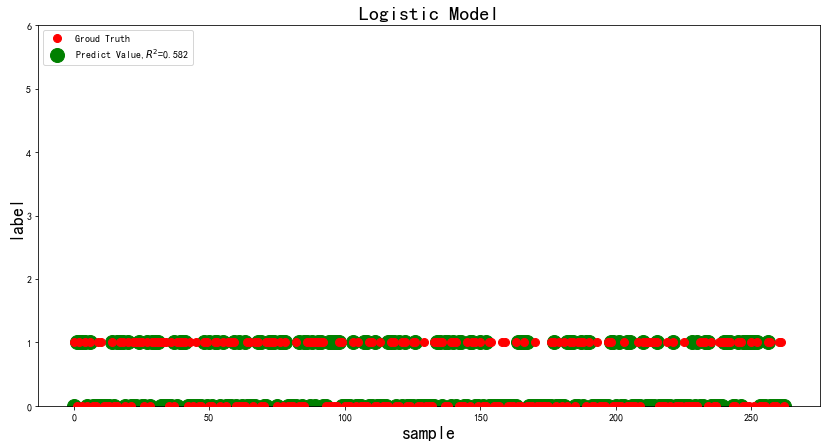

=============Y_test==============
[1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1
 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1
 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1
 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1
 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1
 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1
 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0
 0 1 1 0]
============Y_predict============
[0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0
 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0
 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1
 0 0 1 0 1 1 0 0 0 0 0

In [28]:
#预测
Y_predict = lr.predict(X_test)
 
#画图对预测值和实际值进行比较
x = range(len(X_test))
plt.figure(figsize=(14,7),facecolor="w")
plt.ylim(0,6)
plt.plot(x,Y_test,"ro",markersize=8,zorder=3,label=u"Groud Truth")
plt.plot(x,Y_predict,"go",markersize=14,zorder=2,label=u"Predict Value,$R^2$=%.3f" %lr.score(X_test,Y_test))
plt.legend(loc="upper left")
plt.xlabel(u"sample",fontsize=18)
plt.ylabel(u"label",fontsize=18)
plt.title(u"Logistic Model",fontsize=20)
plt.show()
 
print("=============Y_test==============")
print(Y_test.ravel())
print("============Y_predict============")
print(Y_predict)

In [29]:
from sklearn import metrics

print("预测准确率：", metrics.accuracy_score(Y_test, Y_predict))
print("精度：", metrics.precision_score(Y_test, Y_predict, average="weighted"))
print("召回率：", metrics.recall_score(Y_test, Y_predict, average="weighted"))

预测准确率： 0.5817490494296578
精度： 0.5821357378661398
召回率： 0.5817490494296578


In [17]:
from lm import (
    RidgeRegression,
    LinearRegression,
    BayesianLinearRegressionKnownVariance,
    BayesianLinearRegressionUnknownVariance,
    LogisticRegression,
)

import tests as t
from sklearn import metrics

rige_clf = LinearRegression()
rige_clf.fit(X_train, Y_train)
Y_predict = rige_clf.predict(X_test)

print("预测准确率：", metrics.accuracy_score(Y_test, Y_predict))
print("精度：", metrics.precision_score(Y_test, Y_predict, average="weighted"))
print("召回率：", metrics.recall_score(Y_test, Y_predict, average="weighted"))

Exception: Dot product shape mismatch, (1051,) vs (5, 1051)

## CCA 特征

In [ ]:
## CCA 数据 没有
"""
CCA_FILES = ["CCA.csv", "DMPCCA.csv", "LDCCA.csv", "LPCCA.csv", "rank-CCA.csv", "semi-CCA.csv"]

for fi in CCA_FILES:
    df = pd.read_csv(open(fi, encoding='utf-8'), skiprows=0)  
    #划分训练集与测试集
    target = 't'
    features = [x for x in df.columns if x not in['t']]
    X, Y = df[features], df[target]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    lr = LogisticRegressionCV(
        multi_class="multinomial",
        fit_intercept=True,
        Cs=np.logspace(-2,2,20),
        cv=2,
        penalty="l2",
        solver="lbfgs",
        tol=0.01,
        max_iter = 1000,
        class_weight='balanced', 
    )
    re = lr.fit(X_train,Y_train)
    Y_predict = lr.predict(X_test)
    print("===== %s =====" % fi)
    print("训练准确率：", re.score(X_train,Y_train))
    print("预测准确率：", metrics.accuracy_score(Y_test, Y_predict))
    print("精度：", metrics.precision_score(Y_test, Y_predict, average="weighted"))
    print("召回率：", metrics.recall_score(Y_test, Y_predict, average="weighted"))
    print("==========")
"""